# **Titanic survival prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv("Titanic-Dataset.csv")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data=data.drop(columns='Cabin',axis=1)

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [ ]:
data['Fare'].fillna(data['Fare'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

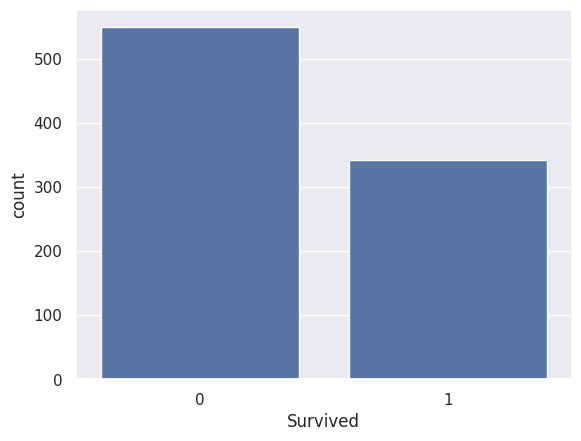

In [ ]:
sns.countplot(x='Survived',data=data)


<Axes: xlabel='Survived', ylabel='count'>

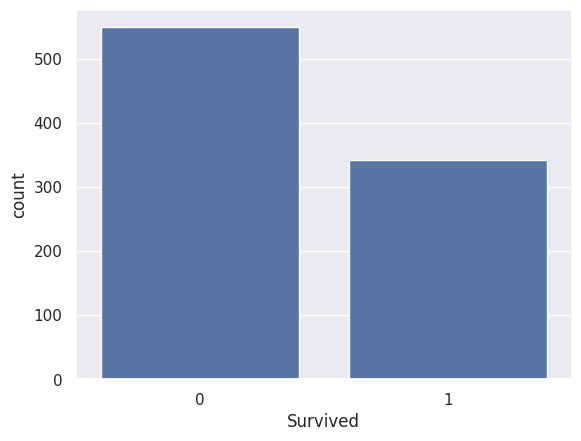

In [ ]:
sns.countplot(x='Survived',data=data)


<Axes: xlabel='Sex', ylabel='count'>

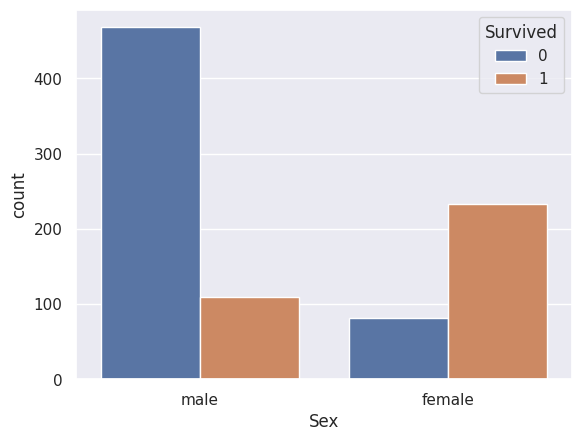

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=data)


<Axes: xlabel='Pclass', ylabel='count'>

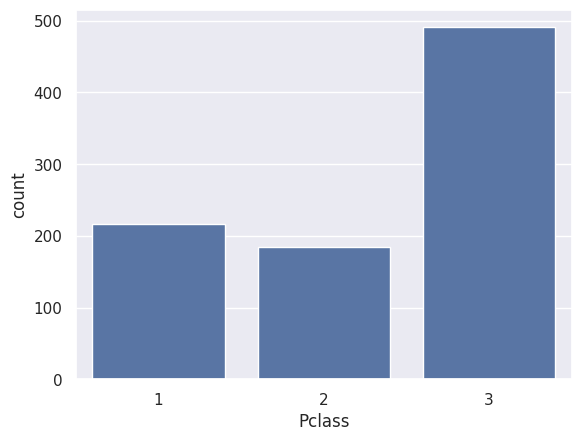

In [ ]:
sns.countplot(x='Pclass',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

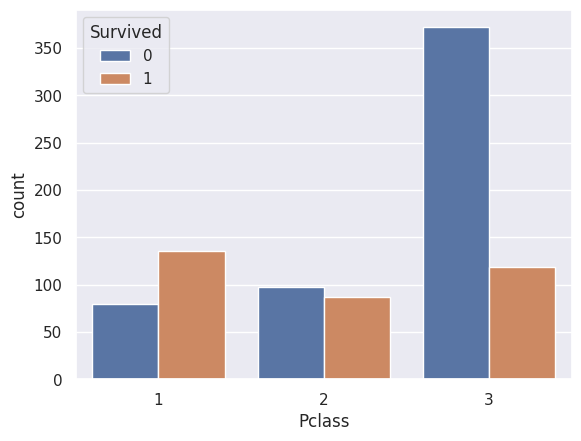

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=data)


In [ ]:
data['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [ ]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [ ]:
X=data.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [ ]:
Y=data['Survived']


In [ ]:
print(X)


     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500         0
1           1       1    1  38.000000      1      0  71.2833         1
2           1       3    1  26.000000      0      0   7.9250         0
3           1       1    1  35.000000      1      0  53.1000         0
4           0       3    0  35.000000      0      0   8.0500         0
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    0  27.000000      0      0  13.0000         0
887         1       1    1  19.000000      0      0  30.0000         0
888         0       3    1  29.699118      1      2  23.4500         0
889         1       1    0  26.000000      0      0  30.0000         1
890         0       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)


In [ ]:
model=LogisticRegression()


In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction=model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [ ]:
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [ ]:
print("Accuracy Score of training data: ",train_data_accuracy)

Accuracy Score of training data:  1.0


In [ ]:
X_test_prediction=model.predict(X_test)

In [ ]:
print(X_test_prediction)


[1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [ ]:
print("Accuracy score of testing data:",test_data_accuracy)

Accuracy score of testing data: 1.0


# Iris flower classification




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris_flower_file=pd.read_csv("iris flower.csv")


In [ ]:
iris_flower_file.head(16)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris_flower_file.shape

(150, 5)

In [ ]:
iris_flower_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_flower_file.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_flower_file.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris_flower_file.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

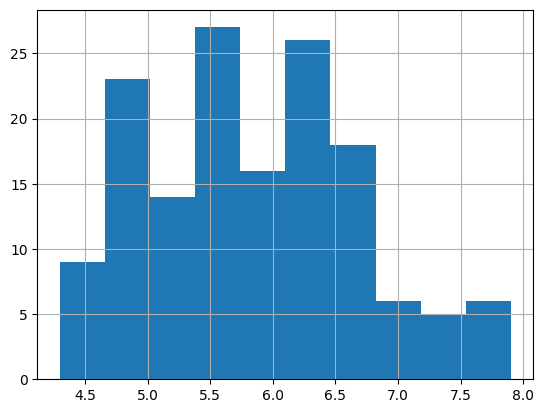

In [ ]:
iris_flower_file['sepal_length'].hist()

<Axes: >

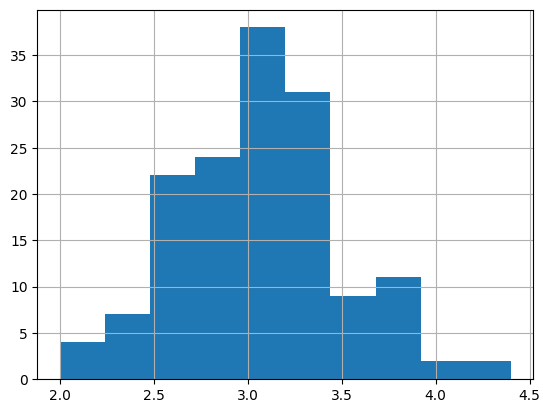

In [ ]:
iris_flower_file['sepal_width'].hist()

<Axes: >

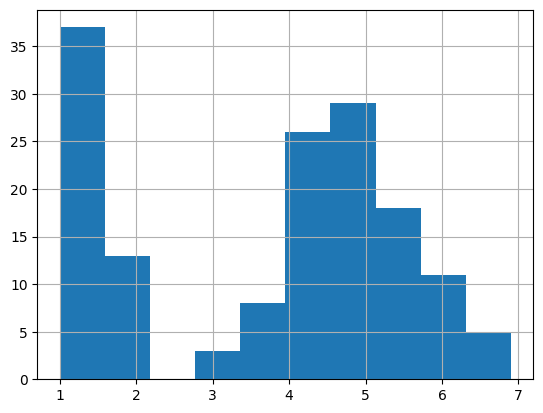

In [ ]:
iris_flower_file['petal_length'].hist()

<Axes: >

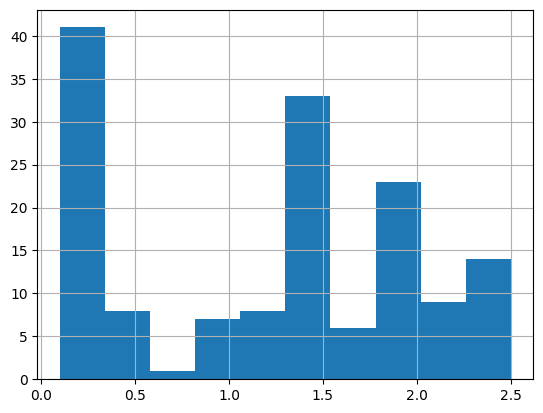

In [ ]:
iris_flower_file['petal_width'].hist()

In [ ]:
colors=['red','Black','teal']


In [ ]:
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

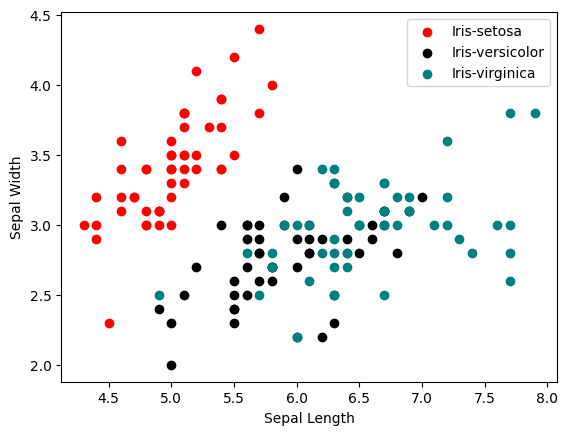

In [ ]:
for i in range(3):
    x=iris_flower_file[iris_flower_file['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

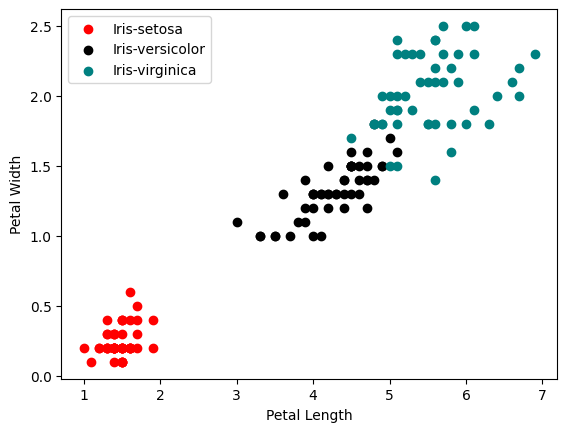

In [ ]:
for i in range(3):
    x=iris_flower_file[iris_flower_file['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

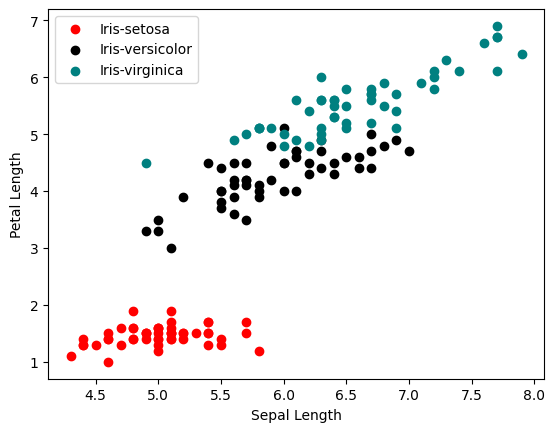

In [ ]:
for i in range(3):
    x=iris_flower_file[iris_flower_file['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

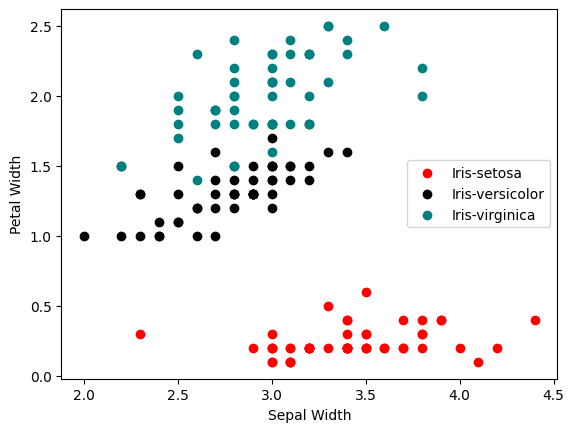

In [ ]:
for i in range(3):
    x=iris_flower_file[iris_flower_file['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

<Axes: >

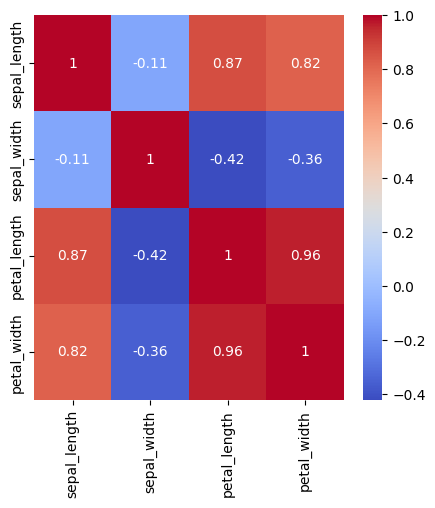

In [ ]:
numeric_columns=iris_flower_file.drop(columns='species')
corr=numeric_columns.corr()
fig,axis=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=axis,cmap='coolwarm')

In [ ]:
le=LabelEncoder()

In [ ]:
iris_flower_file['species']=le.fit_transform(iris_flower_file['species'])

In [ ]:
iris_flower_file.head(16)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
x=iris_flower_file.drop(columns='species')

In [ ]:
y=iris_flower_file['species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
LR=LogisticRegression()

In [ ]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
KNN=KNeighborsClassifier()

In [ ]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
DT=DecisionTreeClassifier()

In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
LR_accuracy=LR.score(x_test,y_test)*100
KNN_accuracy=KNN.score(x_test,y_test)*100
DT_accuracy=DT.score(x_test,y_test)*100

In [ ]:
print(f"Accuracy by using Logistic Regression: {LR_accuracy}%")

Accuracy by using Logistic Regression: 95.55555555555556%


In [ ]:
print(f"Accuracy by using K Nearest Neighbors Algorithm: {KNN_accuracy}%")

Accuracy by using K Nearest Neighbors Algorithm: 97.77777777777777%


In [ ]:
print(f"Accuracy by using Decision Tree Classifier: {DT_accuracy}%")

Accuracy by using Decision Tree Classifier: 97.77777777777777%


# Credit Card Fraud detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
file=pd.read_csv("credit card.csv")

In [ ]:
file.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [ ]:
file.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,49496.000000,49496.000000,49496.000000,49496.000000,49496.000000,49496.000000,49496.000000,49496.000000,49496.000000,49496.000000,...,49496.000000,49496.000000,49496.000000,49495.000000,49495.000000,49495.000000,49495.000000,49495.000000,49495.000000,49495.000000
mean,28768.301802,-0.242346,0.012853,0.693365,0.185317,-0.256531,0.104069,-0.120014,0.053389,0.124416,...,-0.028323,-0.107140,-0.040013,0.008128,0.135807,0.020771,0.004785,0.004497,93.053208,0.002990
std,13091.902527,1.885999,1.630972,1.510638,1.400412,1.413681,1.311183,1.284218,1.224069,1.213547,...,0.736247,0.637739,0.591090,0.594008,0.439070,0.501521,0.388471,0.333387,253.395862,0.054601
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,21681.500000,-0.992553,-0.562269,0.218257,-0.720717,-0.866303,-0.636045,-0.605881,-0.146769,-0.610509,...,-0.231689,-0.529542,-0.178900,-0.322193,-0.128089,-0.330529,-0.063327,-0.006701,7.610000,0.000000
50%,33363.500000,-0.247587,0.079798,0.797481,0.190472,-0.287285,-0.150772,-0.076467,0.058368,0.013000,...,-0.068399,-0.082056,-0.051455,0.062068,0.175607,-0.071826,0.008986,0.022152,25.000000,0.000000
75%,38813.250000,1.155632,0.732861,1.431029,1.067496,0.283761,0.493697,0.425377,0.331366,0.820137,...,0.108060,0.307291,0.078620,0.401385,0.421767,0.299917,0.083909,0.076356,85.000000,0.000000
max,44086.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
file.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
file['Class'].value_counts()

0.0    49347
1.0      148
Name: Class, dtype: int64

In [ ]:
normal=file[file.Class==0]

In [ ]:
fraud=file[file.Class==1]

In [ ]:
print(normal.shape)

(49347, 31)


In [ ]:
print(normal.shape)

(49347, 31)


In [ ]:
normal.Amount.describe()

count    49347.000000
mean        93.031862
std        253.455483
min          0.000000
25%          7.650000
50%         25.000000
75%         84.950000
max      12910.930000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     148.000000
mean      100.170676
std       233.347471
min         0.000000
25%         1.000000
50%         9.560000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
file.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28773.663181,-0.220078,-0.003444,0.726627,0.168038,-0.240251,0.111225,-0.096170,0.042335,0.135542,...,0.046209,-0.031071,-0.106792,-0.039276,0.008406,0.135474,0.020367,0.002991,0.004418,93.031862
1.0,26877.182432,-7.675017,5.448919,-10.398242,5.939649,-5.681176,-2.280722,-8.068966,3.739332,-3.587074,...,0.470319,0.886835,-0.225326,-0.284732,-0.084733,0.246743,0.155479,0.603171,0.030658,100.170676


In [ ]:
normal_sample=normal.sample(n=492)

In [ ]:
new_file=pd.concat([normal_sample,fraud],axis=0)

In [ ]:
new_file.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
23417,32742,1.278328,-0.539904,0.295156,-0.592236,-0.903734,-0.871724,-0.344380,-0.212811,-1.005281,...,0.292972,0.745285,-0.087828,0.451375,0.516404,-0.113104,0.006360,0.018873,53.65,0.0
40949,40475,1.082083,0.354608,1.208843,2.624126,-0.512945,0.083667,-0.245621,0.181901,-0.461327,...,-0.296830,-0.811298,0.167565,0.496374,0.187356,-0.305034,0.011655,0.023193,6.85,0.0
29522,35508,1.035527,-0.351374,1.197827,0.658035,-0.690345,0.960978,-0.890513,0.510963,0.699767,...,0.017997,0.249187,0.075414,-0.244774,0.065476,0.358227,0.043109,0.011230,16.95,0.0
34813,37836,-0.554286,0.921649,0.577475,0.683710,0.552397,1.571565,0.056667,0.970455,-1.058158,...,0.368359,1.065016,0.125316,-0.999012,-0.450085,-0.219174,0.016272,-0.039930,40.00,0.0
20225,30875,-0.302967,1.221342,0.146417,2.212040,0.580242,-0.320352,0.732256,0.128258,-1.504016,...,0.179844,0.528470,0.201464,-0.010110,-0.877111,-0.094760,-0.237658,-0.158070,19.02,0.0
44273,41873,-1.855498,2.139557,-0.035516,0.095681,-1.054712,-1.187773,-0.391847,1.246592,-0.453963,...,-0.206639,-0.804100,0.162786,0.315544,-0.002310,0.089672,0.095379,0.007526,11.99,0.0
5573,5708,-2.610944,2.740458,-1.833788,0.876938,-0.661728,-0.387797,-0.614851,1.657518,0.735737,...,0.041111,0.454812,0.203805,-0.350226,-0.428463,-0.393839,0.464546,0.282112,26.99,0.0
35048,37935,1.301548,-0.866048,0.832720,-0.789236,-1.404167,-0.236643,-1.158120,0.145302,-0.504351,...,0.417978,1.023691,-0.168819,0.023637,0.400648,-0.046181,0.022477,0.015136,39.00,0.0
10212,15875,0.116313,0.094182,0.439869,0.875843,2.080461,4.304726,-0.581838,0.801970,1.447210,...,0.116751,0.735325,0.165807,0.966368,-1.162912,-0.284162,0.141743,0.044704,61.00,0.0
34195,37556,1.118529,0.178323,0.356863,1.176958,-0.334339,-0.689422,0.141578,-0.084474,0.057115,...,0.087205,0.228629,-0.047895,0.395372,0.536769,-0.319879,0.020366,0.024116,35.00,0.0


In [ ]:
new_file['Class'].value_counts()

0.0    492
1.0    148
Name: Class, dtype: int64

In [ ]:
new_file.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,29152.071138,-0.273199,0.014746,0.665872,0.124058,-0.208747,0.269887,-0.096192,0.136714,0.124455,...,0.032154,-0.025152,-0.131943,-0.023049,0.015457,0.124100,-0.011939,-0.007216,-0.005536,97.208618
1.0,26877.182432,-7.675017,5.448919,-10.398242,5.939649,-5.681176,-2.280722,-8.068966,3.739332,-3.587074,...,0.470319,0.886835,-0.225326,-0.284732,-0.084733,0.246743,0.155479,0.603171,0.030658,100.170676


In [ ]:
X=new_file.drop(columns='Class',axis=1)

In [ ]:
Y=new_file['Class']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction=model.predict(X_train)

In [ ]:
training_data_acuracy=accuracy_score(X_train_prediction,Y_train)*100

In [ ]:
print(f"Training Data Accuracy: {training_data_acuracy}%")

Training Data Accuracy: 98.828125%


In [ ]:
X_test_prediction=model.predict(X_test)

In [ ]:
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)*100

In [ ]:
print(f"Test Data Accuracy: {test_data_accuracy}%")

Test Data Accuracy: 95.3125%
